In [2]:
import pandas as pd
import numpy as np
import urllib.request
import unidecode
import matplotlib.pyplot as plt

In [4]:
data_wiatrak_120_1 = pd.read_excel('data/dane_wiatraki/Gaj5.xlsx', sheet_name = '1250164')
data_wiatrak_120_2 = pd.read_excel('data/dane_wiatraki/Gaj5.xlsx', sheet_name = '1250165')
data_wiatrak_120_3 = pd.read_excel('data/dane_wiatraki/Gaj6.xlsx', sheet_name = '1250166')
data_wiatrak_120_4 = pd.read_excel('data/dane_wiatraki/Gaj6.xlsx', sheet_name = '1250167')
data_wiatrak_120 = [data_wiatrak_120_1,data_wiatrak_120_2,data_wiatrak_120_3,data_wiatrak_120_4]
data_wiatrak_140_1 = pd.read_excel('data/dane_wiatraki/Gaj5.xlsx', sheet_name = '1150123')
data_wiatrak_140_2 = pd.read_excel('data/dane_wiatraki/Gaj6.xlsx', sheet_name = '1150124')
data_wiatrak_140 = [data_wiatrak_140_1, data_wiatrak_140_2]
data_wiatrak_70_1 = pd.read_excel('data/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531417')
data_wiatrak_70_2 = pd.read_excel('data/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531418')
data_wiatrak_70_3 = pd.read_excel('data/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '531419')
data_wiatrak_70_4 = pd.read_excel('data/dane_wiatraki/Gaj3_2.xlsx', sheet_name = '481931')
data_wiatrak_70 = [data_wiatrak_70_1,data_wiatrak_70_2,data_wiatrak_70_3,data_wiatrak_70_4]

In [5]:
data_wiatrak_120_1

,Time,Wind Ø [m/s],Energy prod. [MWh],Power Ø [MW],Nacelle position [°],Air pressure Ø [mBar],Air humidity Ø [%]
0,2021-07-01 00:00:00,1.7,0.000,-0.003,289,975,69
1,2021-07-01 00:10:00,1.4,0.000,-0.003,311,975,70
2,2021-07-01 00:20:00,1.4,0.000,-0.003,301,975,70
3,2021-07-01 00:30:00,1.4,0.000,-0.003,319,975,70
4,2021-07-01 00:40:00,1.6,0.000,-0.002,306,975,71
...,...,...,...,...,...,...,...
56155,2022-07-22 23:10:00,8.0,0.279,1.668,16,982,50
56156,2022-07-22 23:20:00,8.5,0.303,1.817,14,982,50
56157,2022-07-22 23:30:00,7.9,0.280,1.679,16,982,49
56158,2022-07-22 23:40:00,8.0,0.255,1.532,18,982,50


In [6]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df.iloc[::6,:]
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df.iloc[::6,:]
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df.iloc[::6,:]

In [12]:
imgw = pd.read_csv('data/dane_wiatraki/s_t_07_2022_2.csv', header=None)

C:\Users\macie\AppData\Local\Temp\ipykernel_15704\1641559332.py:1: DtypeWarning: Columns (6,34,56) have mixed types. Specify dtype option on import or set low_memory=False.
  imgw = pd.read_csv('data/dane_wiatraki/s_t_07_2022_2.csv', header=None)


In [13]:
imgw

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [14]:
with urllib.request.urlopen('https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/terminowe/synop/s_t_format.txt') as file:
    lines = file.readlines()
lines = lines[1:-22]
columns = []
for line in lines:
    columns.append(' '.join(line.decode("utf-8", "ignore").split()[:-1]))
    # columns.append(' '.join(line.decode().split()[:-1]))

In [15]:
columns

['Kod stacji',
 'Nazwa stacji',
 'Rok',
 'Miesic',
 'Dzie',
 'Godzina',
 'Wysoko podstawy chmur CL CM szyfrowana [kod]',
 'Status pomiaru HPOD',
 'Wysoko podstawy niszej [m]',
 'Status pomiaru HPON',
 'Wysoko podstawy wyszej [m]',
 'Status pomiaru HPOW',
 'Wysoko podstawy tekstowy [opis]',
 'Pomiar przyrzadem 1 (nisza) [P]',
 'Pomiar przyrzadem 2 (wysza) [P]',
 'Widzialno [kod]',
 'Status pomiaru WID',
 'Widzialno operatora [m]',
 'Status pomiaru WIDO',
 'Widzialno automat [m]',
 'Status pomiaru WIDA',
 'Zachmurzenie oglne [oktanty]',
 'Status pomiaru NOG',
 'Kierunek wiatru []',
 'Status pomiaru KRWR',
 'Prdko wiatru [m/s]',
 'Status pomiaru FWR',
 'Poryw wiatru [m/s]',
 'Status pomiaru PORW',
 'Temperatura powietrza [C]',
 'Status pomiaru TEMP',
 'Temperatura termometru zwilonego [C]',
 'Status pomiaru TTZW',
 'Wskanik wentylacji [W/N]',
 'Wskanik lodu [L/W]',
 'Cinienie pary wodnej [hPa]',
 'Status pomiaru CPW',
 'Wilgotno wzgldna [%]',
 'Status pomiaru WLGW',
 'Temperatura punktu r

In [16]:
imgw.columns = columns

In [17]:
imgw

,Kod stacji,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Wysoko podstawy chmur CL CM szyfrowana [kod],Status pomiaru HPOD,Wysoko podstawy niszej [m],Status pomiaru HPON,...,Wysoko wieo spadego niegu [cm],Status pomiaru HSS,Wysoko niegu na poletku [cm],Status pomiaru GRSN,Gatunek niegu [kod],Uksztatowanie pokrywy [kod],Wysoko prbki [cm],Status pomiaru HPRO,Ciar prbki [g],Status pomiaru CIPR
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [18]:
imgw['Nazwa stacji'] = imgw['Nazwa stacji'].apply(unidecode.unidecode)

In [19]:
imgw = imgw[["Nazwa stacji","Rok","Miesic","Dzie","Godzina","Temperatura powietrza [C]", "Temperatura punktu rosy [C]","Cinienie na pozimie morza [hPa]","Opad za 6 godzin [mm]"]]

In [20]:
imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000
imgw.pop("Opad za 6 godzin [mm]")

C:\Users\macie\AppData\Local\Temp\ipykernel_15704\632630318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43124    0.0
43125    0.0
43126    0.0
43127    0.0
43128    0.0
Name: Opad za 6 godzin [mm], Length: 43129, dtype: float64

In [22]:
imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
imgw.pop("Temperatura powietrza [C]")
imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15
imgw.pop("Temperatura punktu rosy [C]")

C:\Users\macie\AppData\Local\Temp\ipykernel_15704\3660470806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
C:\Users\macie\AppData\Local\Temp\ipykernel_15704\3660470806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15


0        16.8
1        16.2
2        15.1
3        15.5
4        15.6
         ... 
43124    15.2
43125    15.3
43126    15.2
43127    15.0
43128    14.7
Name: Temperatura punktu rosy [C], Length: 43129, dtype: float64

In [23]:
imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]*100
imgw.pop("Cinienie na pozimie morza [hPa]")

C:\Users\macie\AppData\Local\Temp\ipykernel_15704\3888918082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]*100


0        1012.4
1        1012.0
2        1011.9
3        1012.2
4        1012.6
          ...  
43124    1009.7
43125    1009.6
43126    1009.4
43127    1009.2
43128    1009.2
Name: Cinienie na pozimie morza [hPa], Length: 43129, dtype: float64

In [24]:
imgw

,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,BIELSKO-BIAA,2022,7,1,0,0.0,293.15,289.95,101240.0
1,BIELSKO-BIAA,2022,7,1,1,0.0,293.75,289.35,101200.0
2,BIELSKO-BIAA,2022,7,1,2,0.0,293.45,288.25,101190.0
3,BIELSKO-BIAA,2022,7,1,3,0.0,293.25,288.65,101220.0
4,BIELSKO-BIAA,2022,7,1,4,0.0,293.75,288.75,101260.0
...,...,...,...,...,...,...,...,...,...
43124,SUWAKI,2022,7,31,19,0.0,288.65,288.35,100970.0
43125,SUWAKI,2022,7,31,20,0.0,288.75,288.45,100960.0
43126,SUWAKI,2022,7,31,21,0.0,288.65,288.35,100940.0
43127,SUWAKI,2022,7,31,22,0.0,288.35,288.15,100920.0


In [25]:
opole = imgw[imgw['Nazwa stacji']=='OPOLE'].reset_index()
wroclaw = imgw[imgw['Nazwa stacji']=='WROCAW-STRACHOWICE'].reset_index()

In [26]:
opole_odl = np.sqrt(26**2+60380**2)
wroclaw_odl = np.sqrt(17**2+31690**2)

In [27]:
opole

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,7439,OPOLE,2022,7,1,0,0.0,293.15,290.55,101150.0
1,7440,OPOLE,2022,7,1,1,0.0,292.55,290.55,101130.0
2,7441,OPOLE,2022,7,1,2,0.0,291.85,290.35,101150.0
3,7442,OPOLE,2022,7,1,3,0.0,291.05,290.25,101150.0
4,7443,OPOLE,2022,7,1,4,0.0,292.15,290.85,101190.0
...,...,...,...,...,...,...,...,...,...,...
739,8178,OPOLE,2022,7,31,19,0.0,292.15,285.45,101370.0
740,8179,OPOLE,2022,7,31,20,0.0,289.35,286.05,101420.0
741,8180,OPOLE,2022,7,31,21,0.0,287.75,285.95,101440.0
742,8181,OPOLE,2022,7,31,22,0.0,287.15,285.85,101460.0


In [28]:
wroclaw

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,17111,WROCAW-STRACHOWICE,2022,7,1,0,0.0,295.25,292.05,101120.0
1,17112,WROCAW-STRACHOWICE,2022,7,1,1,0.0,294.55,292.15,101120.0
2,17113,WROCAW-STRACHOWICE,2022,7,1,2,0.0,294.25,291.95,101110.0
3,17114,WROCAW-STRACHOWICE,2022,7,1,3,0.0,293.45,291.35,101130.0
4,17115,WROCAW-STRACHOWICE,2022,7,1,4,0.0,293.65,292.35,101150.0
...,...,...,...,...,...,...,...,...,...,...
739,17850,WROCAW-STRACHOWICE,2022,7,31,19,0.0,293.65,284.55,101330.0
740,17851,WROCAW-STRACHOWICE,2022,7,31,20,0.0,291.15,284.65,101380.0
741,17852,WROCAW-STRACHOWICE,2022,7,31,21,0.0,291.05,284.15,101380.0
742,17853,WROCAW-STRACHOWICE,2022,7,31,22,0.0,289.55,284.65,101380.0


In [29]:
data_interp = pd.DataFrame()
columns_to_interpolate = ["Opad [m]","Temperatura powietrza [K]","Temperatura punktu rosy [K]","Cinienie na pozimie morza [Pa]"]
for column in columns_to_interpolate:
    data_interp[column]=(wroclaw[column]*wroclaw_odl+opole[column]*opole_odl)/(wroclaw_odl+opole_odl)
    # data_interp[column] = wroclaw[column]+opole[column]

In [30]:
datetime_df = pd.DataFrame({
    "year":opole['Rok'],
    "month": opole["Miesic"],
    "day": opole["Dzie"],
    "hour": opole["Godzina"]
})
datetime = pd.to_datetime(datetime_df)
data_interp['Date Time'] = datetime

In [31]:
data_interp = data_interp[data_interp['Date Time']<='2022-07-22 23:00:00']

In [32]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df[df['Time']>='2022-07-01 00:00:00'].reset_index()
# data_wiatrak = data_wiatrak[data_wiatrak['Time']>='2022-07-01 00:00:00'].reset_index()

In [33]:
for i, df in enumerate(data_wiatrak_120):
    data_wiatrak_120[i] = df.iloc[:,2]
for i, df in enumerate(data_wiatrak_140):
    data_wiatrak_140[i] = df.iloc[:,2]
for i, df in enumerate(data_wiatrak_70):
    data_wiatrak_70[i] = df.iloc[:,2]

In [34]:
data_120 = (data_wiatrak_120[0] + data_wiatrak_120[1] + data_wiatrak_120[2] + data_wiatrak_120[3])/4
data_70 = (data_wiatrak_70[0] + data_wiatrak_70[1] + data_wiatrak_70[2] + data_wiatrak_70[3])/4
data_140 = (data_wiatrak_140[0] + data_wiatrak_140[1])/2

In [35]:
data_100 = (data_70*(1/30) + data_120*(1/20) + data_140*(1/40))/(1/30+1/20+1/40)

In [36]:
data_100

0      3.796154
1      2.826923
2      2.200000
3      2.130769
4      2.088462
         ...   
523    2.534615
524    3.565385
525    4.426923
526    5.484615
527    6.576923
Name:  Wind Ø [m/s], Length: 528, dtype: float64

In [37]:
data_interp['windspeed'] = data_100

In [38]:
data_interp

,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa],Date Time,windspeed
0,0.0,293.872809,291.066292,101139.674161,2022-07-01 00:00:00,3.796154
1,0.0,293.238389,291.100711,101126.558054,2022-07-01 01:00:00,2.826923
2,0.0,292.676067,290.900711,101136.232214,2022-07-01 02:00:00,2.200000
3,0.0,291.876067,290.628614,101143.116107,2022-07-01 03:00:00,2.130769
4,0.0,292.666292,291.366292,101176.232214,2022-07-01 04:00:00,2.088462
...,...,...,...,...,...,...
523,0.0,300.615581,286.310487,101576.883893,2022-07-22 19:00:00,2.534615
524,0.0,297.476067,287.090936,101600.325839,2022-07-22 20:00:00,3.565385
525,0.0,295.451423,287.490936,101643.767786,2022-07-22 21:00:00,4.426923
526,0.0,294.138389,288.243483,101673.767786,2022-07-22 22:00:00,5.484615


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import netCDF4

from data_load import load_netcdf
from models import data_prep, compile_and_fit, evaluate, cross_corr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Reshape
from keras.layers import TimeDistributed
from keras.layers import Flatten
import keras_tuner
from tensorflow import keras

In [40]:
df = load_netcdf('C:/Studia/maciej-romanski/data/gaj_olawski')

c:\Studia\maciej-romanski\data_load.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(netCDF2df(path+'/'+filename),ignore_index=True)


In [41]:
df.drop(labels=['ssrd','windspeed_10'], axis=1, inplace = True)

In [42]:
df

,t2m,d2m,msl,tp,Date Time,windspeed_100
0,275.332254,274.286849,101918.532777,1.398094e-06,2014-01-01 00:00:00,6.002099
1,275.114286,274.076596,101898.790426,2.019469e-06,2014-01-01 01:00:00,5.802979
2,274.602475,273.536258,101880.919674,3.650579e-06,2014-01-01 02:00:00,5.867424
3,274.942533,273.854905,101837.691774,7.068143e-06,2014-01-01 03:00:00,5.996153
4,275.290868,274.053719,101794.644996,1.141777e-05,2014-01-01 04:00:00,6.222691
...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,2021-12-31 19:00:00,9.516209
70124,284.497001,281.261584,101575.888525,-8.673617e-19,2021-12-31 20:00:00,9.703558
70125,284.358537,281.442320,101573.573393,2.385622e-06,2021-12-31 21:00:00,10.136289
70126,284.420482,281.305074,101574.499446,1.700153e-04,2021-12-31 22:00:00,11.058230


In [44]:
columns = ['Temperatura powietrza [K]','Temperatura punktu rosy [K]','Cinienie na pozimie morza [Pa]','Opad [m]','Date Time','windspeed']
data_interp = data_interp[columns]

In [45]:
data_interp

,Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa],Opad [m],Date Time,windspeed
0,293.872809,291.066292,101139.674161,0.0,2022-07-01 00:00:00,3.796154
1,293.238389,291.100711,101126.558054,0.0,2022-07-01 01:00:00,2.826923
2,292.676067,290.900711,101136.232214,0.0,2022-07-01 02:00:00,2.200000
3,291.876067,290.628614,101143.116107,0.0,2022-07-01 03:00:00,2.130769
4,292.666292,291.366292,101176.232214,0.0,2022-07-01 04:00:00,2.088462
...,...,...,...,...,...,...
523,300.615581,286.310487,101576.883893,0.0,2022-07-22 19:00:00,2.534615
524,297.476067,287.090936,101600.325839,0.0,2022-07-22 20:00:00,3.565385
525,295.451423,287.490936,101643.767786,0.0,2022-07-22 21:00:00,4.426923
526,294.138389,288.243483,101673.767786,0.0,2022-07-22 22:00:00,5.484615


In [50]:
lookback = 24
future = 6
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, 2014, 2020, 2021, 2021, lookback, future, y_featurename='windspeed_100')
y_index = 4

dense = Sequential([
            Dense(units=200, activation='relu', input_shape=(lookback, X_train.shape[2])),
            # Dropout(0.2),
            Dense(units=200, activation='relu'),
            # Dropout(0.2),
            Dense(units=200, activation='relu'),
            # Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])

lstm = Sequential([
            LSTM(24, activation='relu', input_shape=(lookback, X_train.shape[2]), return_sequences=True),
            LSTM(24, activation='relu', return_sequences=True),
            LSTM(24, activation='relu'),
            Dense(1)
        ])

class mean_baseline():
    def predict(X):
        X = X[:,:,y_index].reshape((X.shape[0], X.shape[1], 1))
        Y = []
        for item in X:
            Y.append(np.mean(item))
        Y = np.array(Y).reshape(len(Y),1)
        return Y

class last_baseline():
    def predict(X):
        X = X[:,:,y_index].reshape((X.shape[0], X.shape[1], 1))
        Y = []
        for item in X:
            Y.append(item[-1])
        Y = np.array(Y).reshape(len(Y),1)
        return Y

mean = mean_baseline
last = last_baseline

In [48]:
def compile_and_fit(model, X_train, y_train):
    early_stopping = keras.callbacks.EarlyStopping(monitor='loss',
                                                   patience=2,
                                                   mode='min')

    model.compile(loss='mean_squared_error',
                  optimizer='adam')

    model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[early_stopping])

In [51]:
compile_and_fit(dense, X_train, y_train)
compile_and_fit(lstm, X_train, y_train)

Epoch 1/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0081
Epoch 2/20
1917/1917 [==============================] - 9s 5ms/step - loss: 0.0067
Epoch 3/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0063
Epoch 4/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0061
Epoch 5/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0060
Epoch 6/20
1917/1917 [==============================] - 9s 5ms/step - loss: 0.0059
Epoch 7/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0058
Epoch 8/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0057
Epoch 9/20
1917/1917 [==============================] - 9s 5ms/step - loss: 0.0057
Epoch 10/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0056
Epoch 11/20
1917/1917 [==============================] - 9s 5ms/step - loss: 0.0056
Epoch 12/20
1917/1917 [==============================] - 10s 5ms/step - loss: 

273/273 [==============================] - 1s 2ms/step
Test Score: 1.6054 RMSE


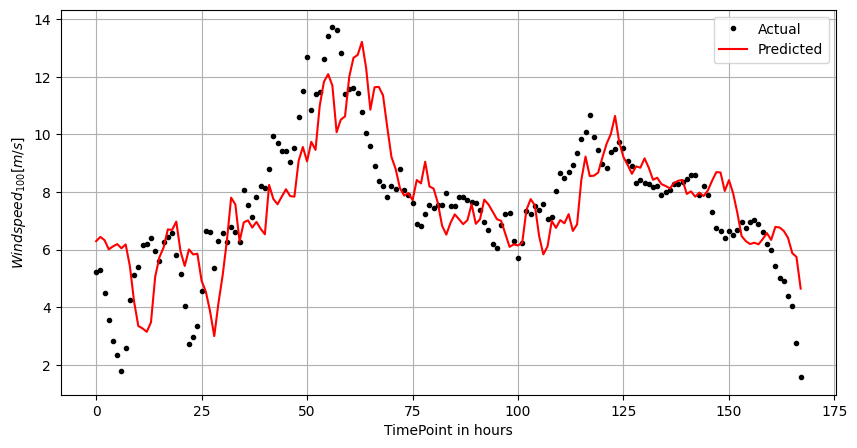

In [52]:
rmse_dense,_,_ = evaluate(dense, X_test, y_test, scaler_y, save_to='figures/speed_6h_dense_wiatraki_era5.png', y_label='$Windspeed_{100}[m/s]$')

273/273 [==============================] - 3s 8ms/step
Test Score: 1.5583 RMSE


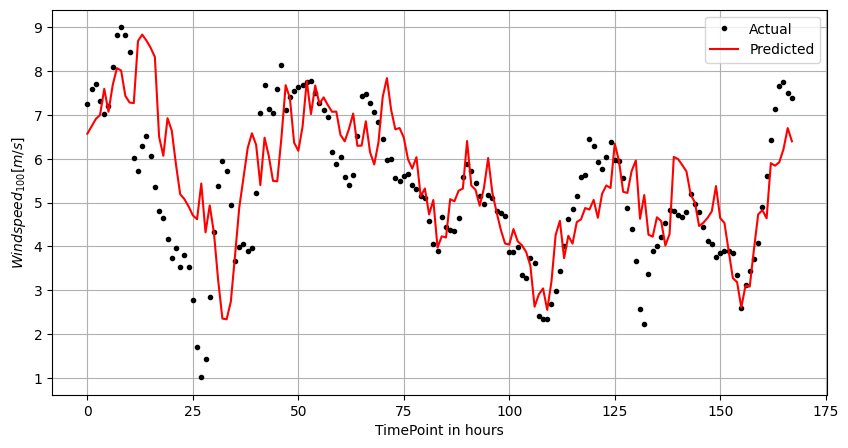

In [53]:
rmse_lstm,_,_ = evaluate(lstm, X_test, y_test, scaler_y, save_to='figures/speed_6h_lstm_wiatraki_era5.png', y_label='$Windspeed_{100}[m/s]$')

In [54]:
_, _, X_test_wiatraki, y_test_wiatraki, scaler_y_wiatraki = data_prep(data_interp, 2022, 2022, 2022, 2022, lookback, future, y_featurename='windspeed')

16/16 [==============================] - 0s 3ms/step
Test Score: 2.1025 RMSE


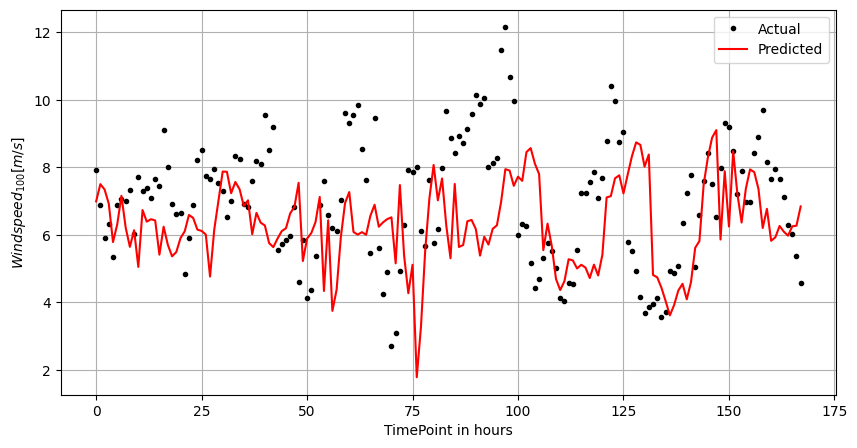

In [55]:
rmse_dense_wiatraki,_,_ = evaluate(dense, X_test_wiatraki, y_test_wiatraki, scaler_y_wiatraki, save_to='figures/speed_6h_dense_wiatraki.png', y_label='$Windspeed_{100}[m/s]$')

 1/16 [>.............................] - ETA: 0s

16/16 [==============================] - 0s 7ms/step
Test Score: 2.1454 RMSE


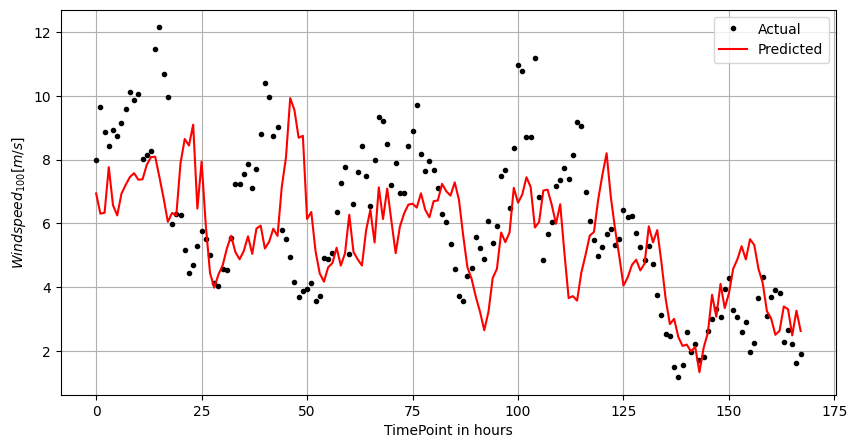

In [58]:
rmse_lstm_wiatraki,_,_ = evaluate(lstm, X_test_wiatraki, y_test_wiatraki, scaler_y_wiatraki, save_to='figures/speed_6h_lstm_wiatraki.png', y_label='$Windspeed_{100}[m/s]$')

In [59]:
df

,t2m,d2m,msl,tp,Date Time,windspeed_100
0,275.332254,274.286849,101918.532777,1.398094e-06,2014-01-01 00:00:00,6.002099
1,275.114286,274.076596,101898.790426,2.019469e-06,2014-01-01 01:00:00,5.802979
2,274.602475,273.536258,101880.919674,3.650579e-06,2014-01-01 02:00:00,5.867424
3,274.942533,273.854905,101837.691774,7.068143e-06,2014-01-01 03:00:00,5.996153
4,275.290868,274.053719,101794.644996,1.141777e-05,2014-01-01 04:00:00,6.222691
...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,2021-12-31 19:00:00,9.516209
70124,284.497001,281.261584,101575.888525,-8.673617e-19,2021-12-31 20:00:00,9.703558
70125,284.358537,281.442320,101573.573393,2.385622e-06,2021-12-31 21:00:00,10.136289
70126,284.420482,281.305074,101574.499446,1.700153e-04,2021-12-31 22:00:00,11.058230


In [60]:
df_july = df[df['Date Time']>='2021-07-01']
df_july = df_july[df_july['Date Time']<'2021-08-01']

In [61]:
_, _, X_test_july, y_test_july, scaler_y_july = data_prep(df_july, 2021, 2021, 2021, 2021, lookback, future, y_featurename='windspeed_100')

23/23 [==============================] - 0s 3ms/step
Test Score: 1.8586 RMSE


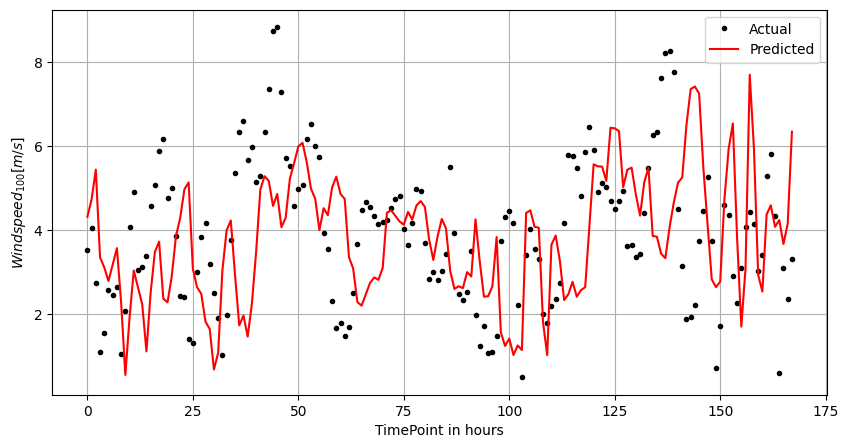

In [62]:
rmse_dense_july,_,_ = evaluate(dense, X_test_july, y_test_july, scaler_y_july, save_to='figures/speed_6h_dense_era_july.png', y_label='$Windspeed_{100}[m/s]$')

23/23 [==============================] - 0s 6ms/step
Test Score: 1.8455 RMSE


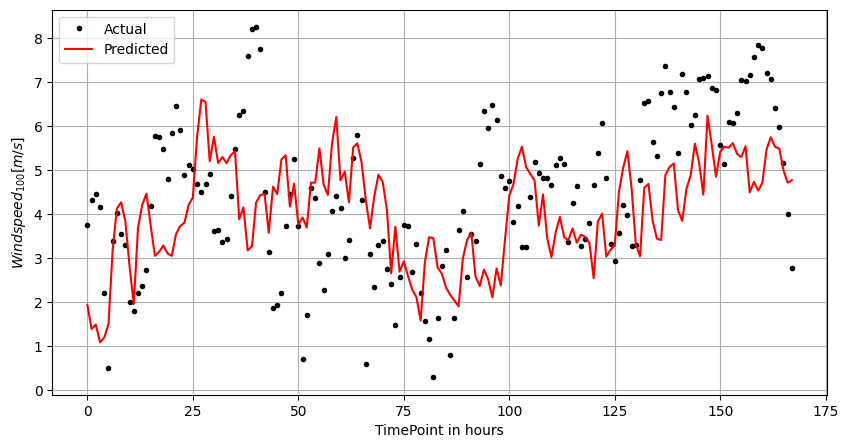

In [64]:
rmse_lstm_july,_,_ = evaluate(lstm, X_test_july, y_test_july, scaler_y_july, save_to='figures/speed_6h_lstm_era_july.png', y_label='$Windspeed_{100}[m/s]$')